In [1]:
import pandas as pd

In [2]:
df01 =  pd.read_csv("after_le.csv")
pd.options.display.max_columns = None
# Load data

In [3]:
df01['Transaction Date'] = pd.to_datetime(df01['Transaction Date'], infer_datetime_format=True)
# Convert Transaction Date into Date form

In [4]:
df01.rename(columns={'Transaction Date':'Transaction_Date'}, inplace=True)

In [5]:
data = df01.drop(['Transaction_Date'], axis=1)
data.index = df01.Transaction_Date
# Transnform date into index

In [7]:
data01 = data[(data["ATM Name"]==1)]
# Only select the ATM 1 which is one of the ATM machine 

In [8]:
data01 = data01.sort_index()
# Sorting by date

In [9]:
import numpy as np

In [10]:
data01 = data01.astype(np.float64)
# convert all date into float as VARMAX only can accept this datatype

In [11]:
data01.dtypes[:]

ATM Name                        float64
No Of Withdrawals               float64
No Of XYZ Card Withdrawals      float64
No Of Other Card Withdrawals    float64
Total amount Withdrawn          float64
Amount withdrawn XYZ Card       float64
Amount withdrawn Other Card     float64
Weekday                         float64
Festival Religion               float64
Working Day                     float64
Holiday Sequence                float64
dtype: object

In [12]:
data01

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,,
2011-01-01,1.0,50.0,20.0,30.0,123800.0,41700.0,82100.0,6.0,1.0,0.0,4.0
2011-01-02,1.0,36.0,17.0,19.0,161700.0,121300.0,40400.0,11.0,4.0,1.0,7.0
2011-01-03,1.0,29.0,14.0,15.0,105800.0,65400.0,40400.0,11.0,4.0,1.0,7.0
2011-01-04,1.0,43.0,20.0,23.0,134700.0,75900.0,58800.0,1.0,4.0,1.0,6.0
2011-01-05,1.0,23.0,6.0,17.0,60200.0,19000.0,41200.0,7.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-05,1.0,96.0,25.0,71.0,441900.0,178200.0,263700.0,0.0,4.0,1.0,6.0
2017-12-06,1.0,95.0,30.0,65.0,383600.0,153700.0,229900.0,2.0,4.0,1.0,3.0
2017-12-07,1.0,95.0,32.0,63.0,421000.0,215200.0,205800.0,12.0,4.0,1.0,7.0


# Seperate data into train and test

In [13]:
begin = pd.Timestamp('2011-01-01')
end = pd.Timestamp('2017-11-30')

train = data01.truncate(before=begin, after=end)
# Seperate for train data for building the model

In [14]:
begin = pd.Timestamp('2017-12-01')
end = pd.Timestamp('2017-12-31')

test = data01.truncate(before=begin, after=end)
# Seperate it for test data for testing the model

In [15]:
train

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,,
2011-01-01,1.0,50.0,20.0,30.0,123800.0,41700.0,82100.0,6.0,1.0,0.0,4.0
2011-01-02,1.0,36.0,17.0,19.0,161700.0,121300.0,40400.0,11.0,4.0,1.0,7.0
2011-01-03,1.0,29.0,14.0,15.0,105800.0,65400.0,40400.0,11.0,4.0,1.0,7.0
2011-01-04,1.0,43.0,20.0,23.0,134700.0,75900.0,58800.0,1.0,4.0,1.0,6.0
2011-01-05,1.0,23.0,6.0,17.0,60200.0,19000.0,41200.0,7.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-05,1.0,113.0,40.0,73.0,477100.0,318000.0,159100.0,8.0,4.0,1.0,7.0
2017-11-06,1.0,137.0,29.0,108.0,580600.0,164900.0,415700.0,5.0,4.0,0.0,1.0
2017-11-07,1.0,122.0,32.0,90.0,476700.0,228700.0,248000.0,9.0,4.0,1.0,7.0


In [16]:
test

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction_Date,,,,,,,,,,,
2017-12-03,1.0,85.0,18.0,67.0,241900.0,92700.0,149200.0,5.0,4.0,0.0,1.0
2017-12-04,1.0,128.0,32.0,96.0,454400.0,185600.0,268800.0,12.0,4.0,1.0,7.0
2017-12-05,1.0,96.0,25.0,71.0,441900.0,178200.0,263700.0,0.0,4.0,1.0,6.0
2017-12-06,1.0,95.0,30.0,65.0,383600.0,153700.0,229900.0,2.0,4.0,1.0,3.0
2017-12-07,1.0,95.0,32.0,63.0,421000.0,215200.0,205800.0,12.0,4.0,1.0,7.0
2017-12-08,1.0,118.0,21.0,97.0,440300.0,123800.0,316500.0,4.0,4.0,0.0,4.0
2017-12-09,1.0,118.0,44.0,74.0,544800.0,304500.0,240300.0,9.0,4.0,1.0,7.0


# Building on model

In [17]:
import statsmodels.api as sm

In [18]:
exog = train[['Weekday','Festival Religion','Working Day','Holiday Sequence']]
model= sm.tsa.VARMAX(train[['Total amount Withdrawn','Amount withdrawn XYZ Card']], order=(5,0), trend='c', exog=exog)
model_result = model.fit(maxiter=1000, disp=False)
#Building the model

C:\Users\LENOVO\Anaconda3\envs\sam\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
model_result.summary()
# Showing the model result summary

Dep. Variable:,"['Total amount Withdrawn', 'Amount withdrawn XYZ Card']",No. Observations:,2347
Model:,VARX(5),Log Likelihood,-58908.744
,+ intercept,AIC,117883.489
Date:,"Fri, 13 Sep 2019",BIC,118073.598
Time:,15:36:31,HQIC,117952.729
Sample:,0,,
,- 2347,,
Covariance Type:,opg,,
Ljung-Box (Q):,"105.96, 98.47",Jarque-Bera (JB):,"259.20, 130.77"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"3.60, 2.16",Skew:,"0.04, 0.02"


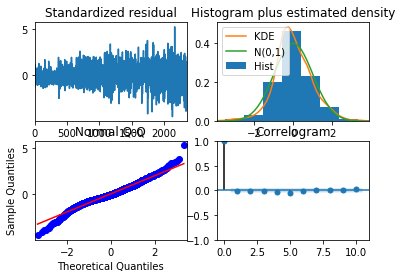

In [23]:
fig2 = model_result.plot_diagnostics()
#plot the result of the model

In [21]:
import matplotlib.pyplot as plt

In [22]:
plt.show(fig2)

In [24]:
test01 = test[['Weekday','Festival Religion','Working Day','Holiday Sequence']]
#using the features of the test data to forecast

In [25]:
exog = test01
pred = model_result.get_forecast(steps=7,exog=exog)
pred_ci = pred.conf_int()
# Forecasting by using the test data features

C:\Users\LENOVO\Anaconda3\envs\sam\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [27]:
pred_ci
# forecasted upper bound and lower bound

,lower Total amount Withdrawn,lower Amount withdrawn XYZ Card,upper Total amount Withdrawn,upper Amount withdrawn XYZ Card
2347,168032.980732,34358.425581,627118.772908,283621.515775
2348,203101.333460,59876.430313,682427.957278,313988.710134
2349,155431.496881,41687.889823,647834.788692,298308.360249
2350,160046.317597,44473.783288,671905.229152,306736.499586
2351,128245.959763,36991.103288,649220.464137,301248.219097
2352,110152.755317,22700.218401,650410.374062,291695.885429
2353,117341.223379,35604.904000,668455.279258,307212.255729


In [26]:
pred.predicted_mean
#forecasted mean result

,Total amount Withdrawn,Amount withdrawn XYZ Card
2347,397575.876820,158989.970678
2348,442764.645369,186932.570223
2349,401633.142787,169998.125036
2350,415975.773375,175605.141437
2351,388733.211950,169119.661193
2352,380281.564689,157198.051915
2353,392898.251318,171408.579865


In [31]:
y_forecasted = pred.predicted_mean
y_truth = test.tail(7)

# Compute the Error Percentage
mse = (y_forecasted["Total amount Withdrawn"].values - y_truth["Total amount Withdrawn"].values).mean()
ep = (abs(round(mse, 2)) / (y_truth["Total amount Withdrawn"].values[0])) * 100
print('The Error Percentage is {} %'.format(round(ep, 2)))

The Error Percentage is 6.38 %
